# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [1]:
import zipfile

from PIL import Image
from PIL import ImageDraw
import pytesseract
import cv2 as cv
import numpy as np
from IPython.display import display
import inspect
from kraken import pageseg


# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')


# the rest is up to you!

In [2]:

def extract_images(zip_file):
    '''''routine to extract data from zip file into a dictionary using filename as key
    and containing a PIL image for each key.
    :param:zip file
    :return: dictionary'''
    #dictionary for store images from zip indexed by filename
    images_dict = {}
    zp = zipfile.ZipFile(zip_file)
    #iterates through files ando converts to a PIL image
    for i in zp.infolist():
        images_dict[i.filename] = Image.open(zp.open(i.filename))
        
    return images_dict                                             


In [3]:
def search(word, zipFile):
    '''Takes a string as first parameter and check if it´s in the images contained in zipFile passed as second,
    then looks for the faces in each image and displays a contact sheet as a PIL image
    :param:string:word'''
    #call function for extract files in zipfile and stores to a dictionary
    images_dict = extract_images(zipFile)
    
    #iterating through the dictionary that contains all the PIL images
    for key in images_dict: 
        
        #convert images and saves in a variable
        img = images_dict[key].convert('RGB') 
        #print(type(img)) #Check the type of file whe're working with
        #extracting the text in the image
        images_dict[key] = pytesseract.image_to_string(img).replace('-\n','') 

        #looking for the word passed as parameter to the function
        if word in images_dict[key]: 

            print("Faces detected in file: " + key)
            try:
                #setting parameters for adjust detectMultiScale function
                scale_factor = 1.30
                min_neighbors = 4 
                #detecting faces with openCV, it takes the img as array and 2 values: scale_factor and min_neighbors
                bounding_boxes = face_cascade.detectMultiScale(np.array(img),scale_factor,min_neighbors).tolist() 
                faces_detected = []
                #crop all the face images an appends into a list
                for x, y, w, h in bounding_boxes:      

                    faces_detected.append(img.crop((x, y, x+w, y+h))) 
                    first_face = faces_detected[0]
                    contact_sheet = Image.new(first_face.mode, (550,110*int(np.ceil(len(faces_detected)/5))))

                #inicializating positional values for pasting images in contact_sheet
                x = 0
                y = 0       
                #iterates throught all faces, sesizes and pastes into contact_sheet    
                for face in faces_detected: 

                    face.thumbnail((110,110))
                    contact_sheet.paste(face, (x, y))

                    if x+110 == contact_sheet.width:
                        x=0
                        y=y+110
                    else:
                        x=x+110

                display(contact_sheet)

            except: print("But there were no faces in that file!")
    


****** Small zip ******
Faces detected in file: a-0.png


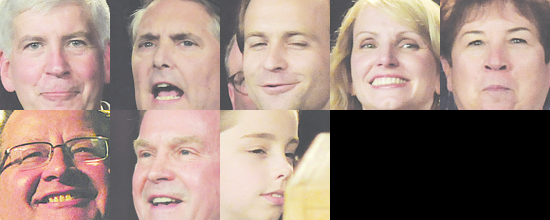

Faces detected in file: a-3.png


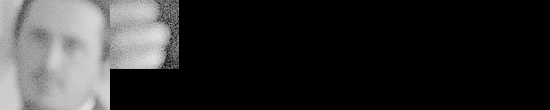

****** Big zip ******
Faces detected in file: a-0.png


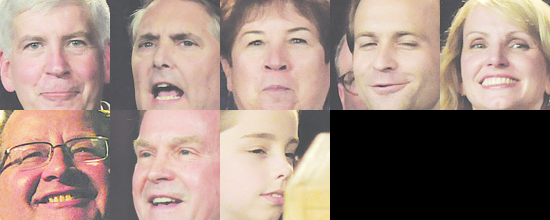

Faces detected in file: a-1.png


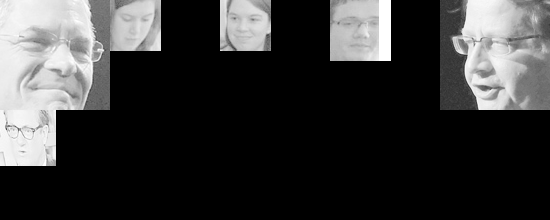

Faces detected in file: a-10.png
But there were no faces in that file!
Faces detected in file: a-13.png


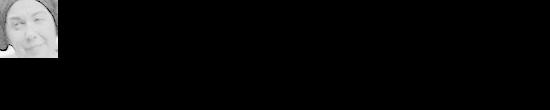

Faces detected in file: a-2.png


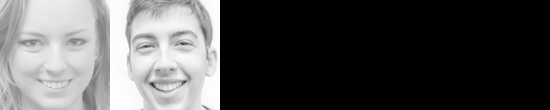

Faces detected in file: a-3.png


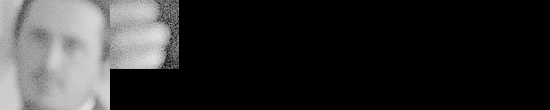

Faces detected in file: a-8.png
But there were no faces in that file!
-----------------EXECUTION FINISHED------------------


In [4]:
#test my function with small file:
print('****** Small zip ******')
search('Christopher',  './readonly/small_img.zip' )
#test with bigger file
print('****** Big zip ******')
search('Mark', './readonly/images.zip')
print('-----------------EXECUTION FINISHED------------------')
